In [2]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [3]:
from keras import regularizers

In [4]:
import os

In [5]:
import librosa
from librosa import display


data, sampling_rate = librosa.load("C:\\Users\\ayushi rastogi\\Stress Detector for Depression\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-05-02-01-02-01.wav")

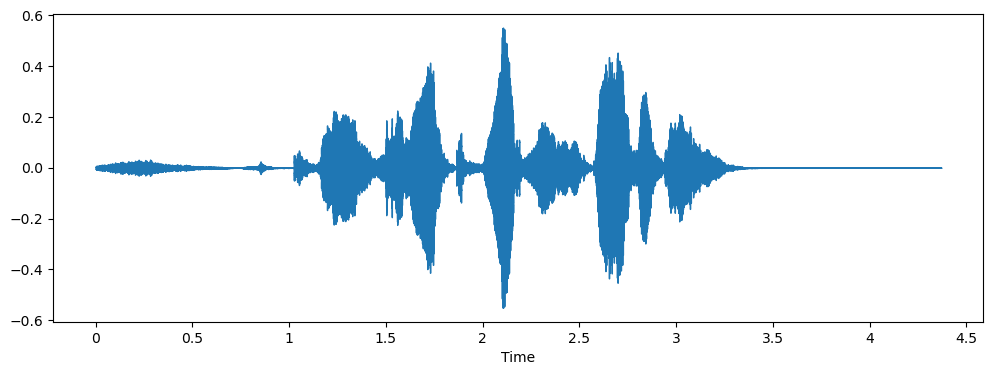

In [6]:
%matplotlib inline
import os
import pandas as pd
import glob


plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

C:\Users\ayushi rastogi\AppData\Local\Temp\ipykernel_21440\1885044104.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('C:\\Users\\ayushi rastogi\\Stress Detector for Depression\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-05-02-01-02-01.wav')


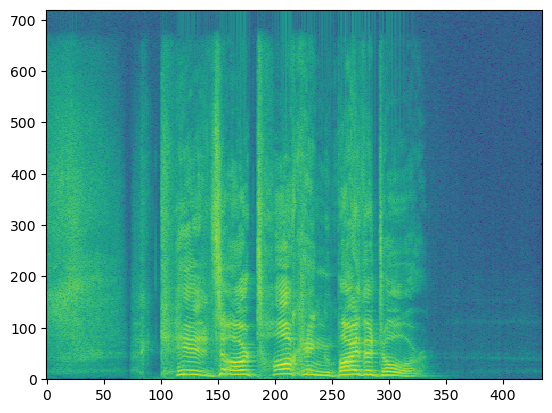

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('C:\\Users\\ayushi rastogi\\Stress Detector for Depression\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-05-02-01-02-01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()
plt.cla()
plt.clf()

In [8]:
import time
import resampy

path = 'C:\\Users\\ayushi rastogi\\Stress Detector for Depression\\Audio_Speech_Actors_01-24\\Actor_01'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 4.268923997879028 seconds ---


In [9]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [10]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((60, 40), (60,))

In [11]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'C:\\Users\\ayushi rastogi\\Stress Detector for Depression\\Saved_Models'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))


In [12]:
# Loading saved models

X = joblib.load('C:\\Users\\ayushi rastogi\\Stress Detector for Depression\\Saved_Models\\X.joblib')
y = joblib.load('C:\\Users\\ayushi rastogi\\Stress Detector for Depression\\Saved_Models\\y.joblib')

## Decision Tree Model

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
predictions = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         1
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.50      0.25      0.33         4

    accuracy                           0.33        18
   macro avg       0.41      0.32      0.34        18
weighted avg       0.46      0.33      0.36        18



C:\Users\ayushi rastogi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayushi rastogi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayushi rastogi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier


In [20]:
rforest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [21]:
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=100,
                       min_samples_leaf=3, min_samples_split=20,
                       n_estimators=22000, random_state=5)

In [22]:
predictions = rforest.predict(X_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.43      1.00      0.60         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4

    accuracy                           0.17        18
   macro avg       0.05      0.12      0.07        18
weighted avg       0.07      0.17      0.10        18



C:\Users\ayushi rastogi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayushi rastogi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayushi rastogi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayushi rastogi\anaconda3\li

In [24]:
##Neural Network
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [25]:
x_traincnn.shape, x_testcnn.shape

((42, 40, 1), (18, 40, 1))

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import backend as k
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

C:\Users\ayushi rastogi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 128)           768       
                                                                 
 activation (Activation)     (None, 40, 128)           0         
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 activation_1 (Activation)   (None, 5, 128)            0         
                                                        

In [28]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
3/3 [==============================] - 1s 178ms/step - loss: 16.7736 - accuracy: 0.1667 - val_loss: 17.7817 - val_accuracy: 0.1667
Epoch 2/1000
3/3 [==============================] - 0s 59ms/step - loss: 19.1188 - accuracy: 0.0476 - val_loss: 9.0879 - val_accuracy: 0.0556
Epoch 3/1000
3/3 [==============================] - 0s 24ms/step - loss: 10.3042 - accuracy: 0.0714 - val_loss: 8.3733 - val_accuracy: 0.2222
Epoch 4/1000
3/3 [==============================] - 0s 56ms/step - loss: 11.2978 - accuracy: 0.0952 - val_loss: 6.5215 - val_accuracy: 0.1111
Epoch 5/1000
3/3 [==============================] - 0s 25ms/step - loss: 9.1590 - accuracy: 0.1190 - val_loss: 5.2443 - val_accuracy: 0.3333
Epoch 6/1000
3/3 [==============================] - 0s 40ms/step - loss: 8.9545 - accuracy: 0.1667 - val_loss: 2.9674 - val_accuracy: 0.3333
Epoch 7/1000
3/3 [==============================] - 0s 40ms/step - loss: 7.3313 - accuracy: 0.1190 - val_loss: 5.9176 - val_accuracy: 0.1111
Epoch 8

Epoch 59/1000
3/3 [==============================] - 0s 39ms/step - loss: 1.5772 - accuracy: 0.5238 - val_loss: 1.4918 - val_accuracy: 0.5556
Epoch 60/1000
3/3 [==============================] - 0s 41ms/step - loss: 1.4021 - accuracy: 0.5000 - val_loss: 1.5644 - val_accuracy: 0.4444
Epoch 61/1000
3/3 [==============================] - 0s 41ms/step - loss: 1.2261 - accuracy: 0.5952 - val_loss: 1.6195 - val_accuracy: 0.4444
Epoch 62/1000
3/3 [==============================] - 0s 58ms/step - loss: 1.5245 - accuracy: 0.4048 - val_loss: 1.6498 - val_accuracy: 0.3889
Epoch 63/1000
3/3 [==============================] - 0s 59ms/step - loss: 1.2561 - accuracy: 0.5238 - val_loss: 1.6098 - val_accuracy: 0.3889
Epoch 64/1000
3/3 [==============================] - 0s 44ms/step - loss: 1.4001 - accuracy: 0.4762 - val_loss: 1.5681 - val_accuracy: 0.5000
Epoch 65/1000
3/3 [==============================] - 0s 59ms/step - loss: 1.4244 - accuracy: 0.4762 - val_loss: 1.7067 - val_accuracy: 0.4444
Epoch 

3/3 [==============================] - 0s 39ms/step - loss: 0.7197 - accuracy: 0.7857 - val_loss: 1.2922 - val_accuracy: 0.6111
Epoch 117/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.7967 - accuracy: 0.6429 - val_loss: 1.3217 - val_accuracy: 0.5556
Epoch 118/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.6605 - accuracy: 0.8095 - val_loss: 1.4461 - val_accuracy: 0.5556
Epoch 119/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.6457 - accuracy: 0.7619 - val_loss: 1.5074 - val_accuracy: 0.5556
Epoch 120/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.6844 - accuracy: 0.7381 - val_loss: 1.4703 - val_accuracy: 0.5556
Epoch 121/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.6313 - accuracy: 0.7619 - val_loss: 1.3097 - val_accuracy: 0.5556
Epoch 122/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.6832 - accuracy: 0.7381 - val_loss: 1.2316 - val_accuracy: 0.6111
Epoch 123/1000

3/3 [==============================] - 0s 57ms/step - loss: 0.3105 - accuracy: 0.9048 - val_loss: 1.4441 - val_accuracy: 0.6111
Epoch 174/1000
3/3 [==============================] - 0s 57ms/step - loss: 0.4762 - accuracy: 0.7857 - val_loss: 1.4739 - val_accuracy: 0.6111
Epoch 175/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.2611 - accuracy: 0.9286 - val_loss: 1.4531 - val_accuracy: 0.6111
Epoch 176/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.2476 - accuracy: 0.9286 - val_loss: 1.4663 - val_accuracy: 0.4444
Epoch 177/1000
3/3 [==============================] - 0s 60ms/step - loss: 0.3256 - accuracy: 0.9048 - val_loss: 1.3172 - val_accuracy: 0.6111
Epoch 178/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.2883 - accuracy: 0.9048 - val_loss: 1.3923 - val_accuracy: 0.6667
Epoch 179/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.3484 - accuracy: 0.9286 - val_loss: 1.6110 - val_accuracy: 0.6111
Epoch 180/1000

3/3 [==============================] - 0s 59ms/step - loss: 0.1386 - accuracy: 1.0000 - val_loss: 1.6839 - val_accuracy: 0.6111
Epoch 231/1000
3/3 [==============================] - 0s 59ms/step - loss: 0.1889 - accuracy: 0.9286 - val_loss: 1.4845 - val_accuracy: 0.6667
Epoch 232/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.2731 - accuracy: 0.8810 - val_loss: 1.3211 - val_accuracy: 0.7222
Epoch 233/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1670 - accuracy: 0.9762 - val_loss: 1.1900 - val_accuracy: 0.6111
Epoch 234/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.2168 - accuracy: 0.9524 - val_loss: 1.2949 - val_accuracy: 0.6111
Epoch 235/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.1756 - accuracy: 0.9524 - val_loss: 1.4753 - val_accuracy: 0.5000
Epoch 236/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.1921 - accuracy: 0.9762 - val_loss: 1.4666 - val_accuracy: 0.6667
Epoch 237/1000

3/3 [==============================] - 0s 48ms/step - loss: 0.0623 - accuracy: 1.0000 - val_loss: 1.3557 - val_accuracy: 0.5556
Epoch 288/1000
3/3 [==============================] - 0s 51ms/step - loss: 0.1724 - accuracy: 0.9286 - val_loss: 1.3309 - val_accuracy: 0.5556
Epoch 289/1000
3/3 [==============================] - 0s 60ms/step - loss: 0.1100 - accuracy: 0.9762 - val_loss: 1.4121 - val_accuracy: 0.6111
Epoch 290/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0871 - accuracy: 0.9762 - val_loss: 1.6153 - val_accuracy: 0.5556
Epoch 291/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.1418 - accuracy: 0.9524 - val_loss: 1.7331 - val_accuracy: 0.5000
Epoch 292/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0897 - accuracy: 0.9762 - val_loss: 1.5363 - val_accuracy: 0.5000
Epoch 293/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0747 - accuracy: 1.0000 - val_loss: 1.4372 - val_accuracy: 0.5000
Epoch 294/1000

3/3 [==============================] - 0s 58ms/step - loss: 0.0895 - accuracy: 0.9524 - val_loss: 1.7960 - val_accuracy: 0.6111
Epoch 345/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.1140 - accuracy: 0.9524 - val_loss: 1.6778 - val_accuracy: 0.6111
Epoch 346/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.0805 - accuracy: 0.9524 - val_loss: 1.6996 - val_accuracy: 0.5000
Epoch 347/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0560 - accuracy: 1.0000 - val_loss: 1.7267 - val_accuracy: 0.5000
Epoch 348/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.0577 - accuracy: 1.0000 - val_loss: 1.6745 - val_accuracy: 0.5000
Epoch 349/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 1.6066 - val_accuracy: 0.5000
Epoch 350/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0795 - accuracy: 0.9762 - val_loss: 1.5925 - val_accuracy: 0.6111
Epoch 351/1000

3/3 [==============================] - 0s 58ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 1.6611 - val_accuracy: 0.6111
Epoch 402/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.0465 - accuracy: 1.0000 - val_loss: 1.7879 - val_accuracy: 0.5000
Epoch 403/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.0684 - accuracy: 1.0000 - val_loss: 1.5765 - val_accuracy: 0.5000
Epoch 404/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 1.6802 - val_accuracy: 0.6111
Epoch 405/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0576 - accuracy: 0.9762 - val_loss: 1.9419 - val_accuracy: 0.6667
Epoch 406/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0623 - accuracy: 1.0000 - val_loss: 1.7677 - val_accuracy: 0.6667
Epoch 407/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 1.4699 - val_accuracy: 0.6111
Epoch 408/1000

3/3 [==============================] - 0s 42ms/step - loss: 0.0480 - accuracy: 0.9762 - val_loss: 1.7743 - val_accuracy: 0.6111
Epoch 459/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 1.6891 - val_accuracy: 0.6111
Epoch 460/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 1.6795 - val_accuracy: 0.6667
Epoch 461/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 1.6796 - val_accuracy: 0.7222
Epoch 462/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 1.7170 - val_accuracy: 0.6667
Epoch 463/1000
3/3 [==============================] - 0s 59ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 1.6944 - val_accuracy: 0.6111
Epoch 464/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 1.7067 - val_accuracy: 0.6111
Epoch 465/1000

3/3 [==============================] - 0s 56ms/step - loss: 0.0410 - accuracy: 1.0000 - val_loss: 1.7409 - val_accuracy: 0.5556
Epoch 516/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.0381 - accuracy: 0.9762 - val_loss: 2.0028 - val_accuracy: 0.5556
Epoch 517/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.1673 - val_accuracy: 0.5000
Epoch 518/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.2384 - val_accuracy: 0.4444
Epoch 519/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0342 - accuracy: 0.9762 - val_loss: 1.9726 - val_accuracy: 0.5000
Epoch 520/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.0619 - accuracy: 0.9762 - val_loss: 1.5949 - val_accuracy: 0.5556
Epoch 521/1000
3/3 [==============================] - 0s 57ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 1.3901 - val_accuracy: 0.5556
Epoch 522/1000

3/3 [==============================] - 0s 39ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.5613 - val_accuracy: 0.5556
Epoch 573/1000
3/3 [==============================] - 0s 57ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 1.6525 - val_accuracy: 0.6111
Epoch 574/1000
3/3 [==============================] - 0s 57ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.7446 - val_accuracy: 0.6111
Epoch 575/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 1.8358 - val_accuracy: 0.6111
Epoch 576/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 1.8392 - val_accuracy: 0.6111
Epoch 577/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.7864 - val_accuracy: 0.6111
Epoch 578/1000
3/3 [==============================] - 0s 60ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 1.6748 - val_accuracy: 0.5556
Epoch 579/1000

3/3 [==============================] - 0s 57ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 1.6153 - val_accuracy: 0.6111
Epoch 630/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 1.8236 - val_accuracy: 0.5556
Epoch 631/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 2.0020 - val_accuracy: 0.5000
Epoch 632/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 2.1353 - val_accuracy: 0.5556
Epoch 633/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.0376 - accuracy: 0.9762 - val_loss: 2.1480 - val_accuracy: 0.6111
Epoch 634/1000
3/3 [==============================] - 0s 55ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 2.0369 - val_accuracy: 0.5556
Epoch 635/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 2.0198 - val_accuracy: 0.5556
Epoch 636/1000

3/3 [==============================] - 0s 40ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.9248 - val_accuracy: 0.6667
Epoch 687/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 1.8349 - val_accuracy: 0.6111
Epoch 688/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0390 - accuracy: 0.9762 - val_loss: 1.7884 - val_accuracy: 0.6111
Epoch 689/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 1.8629 - val_accuracy: 0.5556
Epoch 690/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.9942 - val_accuracy: 0.5000
Epoch 691/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 2.1144 - val_accuracy: 0.5000
Epoch 692/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 2.2627 - val_accuracy: 0.5000
Epoch 693/1000

3/3 [==============================] - 0s 28ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 1.5889 - val_accuracy: 0.5556
Epoch 744/1000
3/3 [==============================] - 0s 59ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 1.6482 - val_accuracy: 0.5000
Epoch 745/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0665 - accuracy: 0.9762 - val_loss: 1.7591 - val_accuracy: 0.5556
Epoch 746/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 2.0728 - val_accuracy: 0.5556
Epoch 747/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 2.2892 - val_accuracy: 0.5556
Epoch 748/1000
3/3 [==============================] - 0s 54ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 2.4033 - val_accuracy: 0.5556
Epoch 749/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 2.4189 - val_accuracy: 0.5000
Epoch 750/1000

3/3 [==============================] - 0s 39ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.9306 - val_accuracy: 0.6111
Epoch 801/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.9652 - val_accuracy: 0.6111
Epoch 802/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 2.0230 - val_accuracy: 0.6111
Epoch 803/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 2.0292 - val_accuracy: 0.6667
Epoch 804/1000
3/3 [==============================] - 0s 59ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0163 - val_accuracy: 0.6667
Epoch 805/1000
3/3 [==============================] - 0s 56ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 1.9793 - val_accuracy: 0.6667
Epoch 806/1000
3/3 [==============================] - 0s 57ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9872 - val_accuracy: 0.6111
Epoch 807/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.1435 - accuracy: 0.9524 - val_loss: 1.8783 - val_accuracy: 0.6111
Epoch 858/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.6887 - val_accuracy: 0.7222
Epoch 859/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.7011 - val_accuracy: 0.6667
Epoch 860/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0480 - accuracy: 0.9762 - val_loss: 1.7605 - val_accuracy: 0.6111
Epoch 861/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 2.0569 - val_accuracy: 0.5556
Epoch 862/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 2.4039 - val_accuracy: 0.5000
Epoch 863/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 2.3266 - val_accuracy: 0.5556
Epoch 864/1000

3/3 [==============================] - 0s 44ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.8100 - val_accuracy: 0.5556
Epoch 915/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8851 - val_accuracy: 0.5556
Epoch 916/1000
3/3 [==============================] - 0s 57ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.9324 - val_accuracy: 0.5556
Epoch 917/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 2.0102 - val_accuracy: 0.5556
Epoch 918/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 2.1610 - val_accuracy: 0.5556
Epoch 919/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.2369 - val_accuracy: 0.5556
Epoch 920/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.3183 - val_accuracy: 0.5556
Epoch 921/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.1116 - accuracy: 0.9762 - val_loss: 3.0161 - val_accuracy: 0.5556
Epoch 972/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0700 - accuracy: 0.9524 - val_loss: 2.4053 - val_accuracy: 0.6667
Epoch 973/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0731 - accuracy: 0.9762 - val_loss: 2.3816 - val_accuracy: 0.5556
Epoch 974/1000
3/3 [==============================] - 0s 57ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.2606 - val_accuracy: 0.5000
Epoch 975/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 2.2623 - val_accuracy: 0.4444
Epoch 976/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 2.0670 - val_accuracy: 0.5000
Epoch 977/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 1.9667 - val_accuracy: 0.5000
Epoch 978/1000

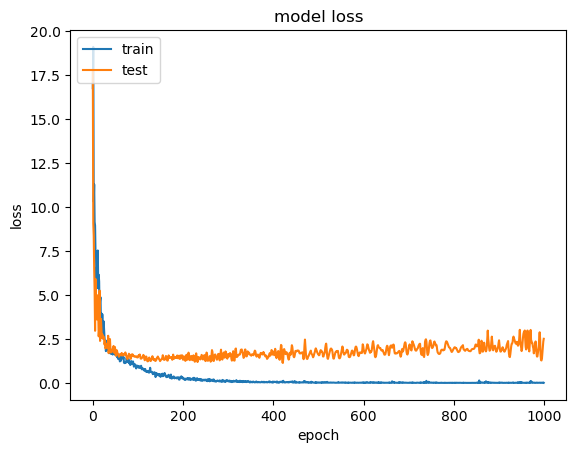

<Figure size 640x480 with 0 Axes>

In [30]:
# Loss 
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.cla()
plt.clf()


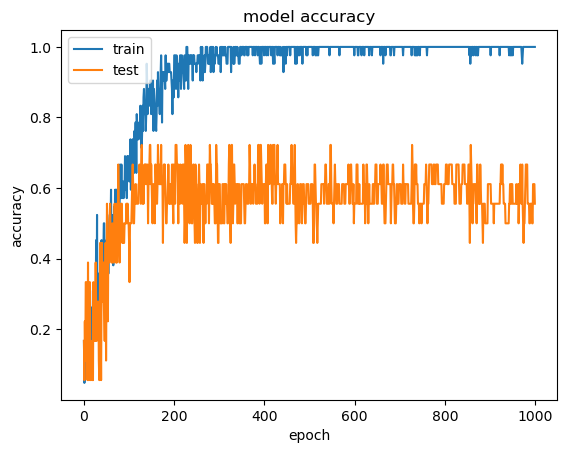

In [31]:
## This is for Accuracy
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
predictions = model.predict(x_testcnn)
predictionsnp.argmax(predictions, axis=1)

1/1 [==============================] - 0s 39ms/step


NameError: name 'axis' is not defined

In [45]:
predictions

array([[5.70953418e-08, 1.38788735e-07, 1.89658619e-13, 2.52985956e-14,
        1.33429983e-14, 9.99999821e-01, 1.09292180e-13, 4.01692604e-17],
       [7.14926198e-02, 2.38758186e-03, 1.64610424e-06, 6.11845553e-01,
        3.68321525e-05, 2.13407457e-01, 1.00801386e-01, 2.69574393e-05],
       [8.18357697e-14, 5.84831781e-17, 3.00819138e-08, 2.33914981e-17,
        5.66889938e-11, 9.99999940e-01, 8.24498239e-13, 1.11974076e-13],
       [2.10387301e-19, 1.15065835e-24, 3.24350557e-15, 8.64174832e-22,
        2.20523166e-11, 9.99999940e-01, 2.54100992e-19, 5.62112968e-21],
       [1.14878492e-06, 5.40020029e-10, 7.45150745e-01, 3.54126435e-08,
        1.21091112e-01, 1.33746296e-01, 1.41672535e-06, 9.26756820e-06],
       [6.85828483e-14, 1.91964425e-18, 1.87594818e-11, 3.04873926e-20,
        3.97903171e-15, 9.99999940e-01, 6.40884898e-18, 1.41000569e-22],
       [5.39478779e-01, 3.52746308e-01, 4.74620174e-06, 1.69257354e-02,
        1.59020374e-07, 9.05972645e-02, 2.45773757e-04, 1.

In [34]:
y_test

array([5, 3, 5, 5, 2, 5, 1, 6, 0, 6, 7, 1, 7, 3, 7, 1, 7, 3])

In [35]:
new_Ytest = y_test.astype(int)

In [36]:
new_Ytest

array([5, 3, 5, 5, 2, 5, 1, 6, 0, 6, 7, 1, 7, 3, 7, 1, 7, 3])

In [37]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = 'C:\\Users\\ayushi rastogi\\Stress Detector for Depression\\Saved_Models\\'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [73]:
from tensorflow import keras

from tensorflow.keras.models import load_model

from tensorflow.keras.utils import CustomObjectScope

from tensorflow.keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):

    loaded_model = load_model('C:\\Users\\ayushi rastogi\\Stress Detector for Depression\\Saved_Models\\Emotion_Voice_Detection_Model.h5')
    loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_3 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
activation_4 (Activation)    (None, 5, 128)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 128)           

In [74]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

18/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 5ms/sample - loss: 1.6930 - accuracy: 0.7222
Restored model, accuracy: 72.22%
